<a href="https://colab.research.google.com/github/pauloabq/quarentena-dados/blob/master/Quarentena_dados_Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5: Modelo de Regressão e Machine Learning

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)


colunas_de_notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ["ciencias_naturais","ciencias_humanas","linguagem_codigo","matematica","redacao"]
dados_notas.head()



,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [32]:
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Dada uma sequência de números, é possível identificar um novo númro?

Matematicamente, vamos tentar adivinhar a nota de **linguagem_codigo** com base nas demais notas.


In [33]:
x_tenho = dados_notas[["ciencias_naturais","ciencias_humanas","matematica","redacao"]]
x_tenho.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [34]:
y_adivinhar = dados_notas["linguagem_codigo"]
y_adivinhar.head()

1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagem_codigo, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios

> Tentar detectar um padrão: 
> Primeiro: Separar os dados de treino e teste.

In [35]:
from sklearn.model_selection import train_test_split
import numpy as np

# fixando um padrão para numero randômico que é utilizado em train_test_split (e também nas demais que utilizam random_state.)
np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_tenho, y_adivinhar, random_state =  326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)



(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [36]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00



> Depois: treinar com base em um algoritmo

Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro **Modelo de Regressão** (Em aula discutimos a diferença entre regressão e classificação).

Vamos utilizar o `LinearSVR` do `scikit-learn`:



In [37]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a **predição** chamamos o método `.predict()` do **modelo**.

> predicoes_notas_linguagem - é o que o algoritmo acha que seriam as notas em linguagem dadas todas as demais notas. Lembrando que é uma lista python, e não uma série pandas.

In [38]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

> Os números seguem um padrão, mas ainda não 'acertou' (pois estamos utilizando um modelo linear - LinearSVR

In [39]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

> Vamos plotar os dados reais vs os que o algorítmo encontrou (previu)

Nos próximos trechos de códigos vamos plotar alguns gráficos! As discussões e todas as análises sobre estas visualizações foram feitas de forma muito rica na videoaula, portanto recomendo fortemente acompanhá-las.

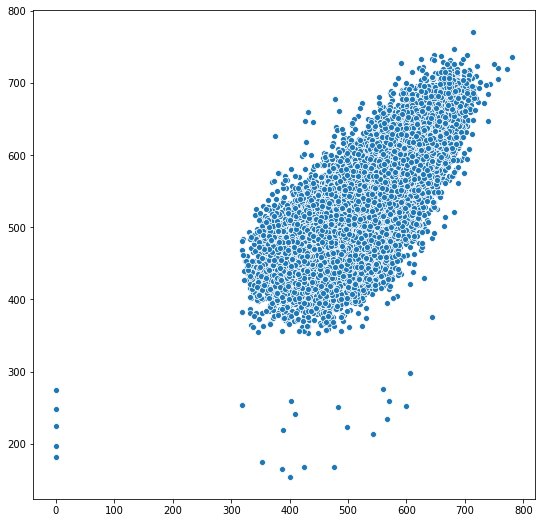

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)
plt.show()

> Percebem-se casos onde o valor era 400, mas o algoritmo encontrou 100

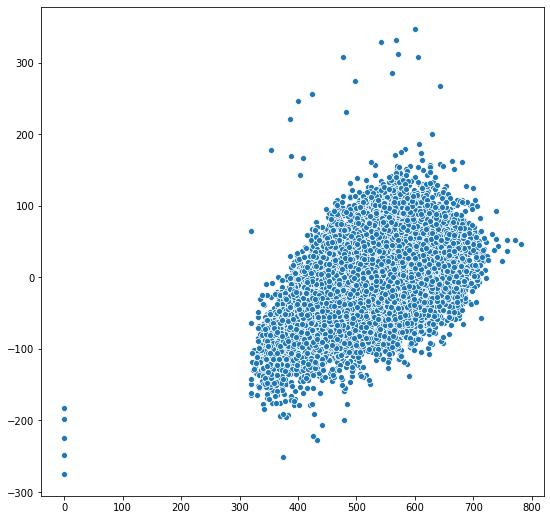

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)
plt.show()

> Visualizando a diferença entre o que a pessoa tirou, e o que o algoritmo achou. O que foge do 0 são os casos de erro

In [42]:
 x_teste.mean(axis=1)

67300    607.10
113766   630.62
48328    655.92
9454     545.45
9515     491.50
          ...  
32842    458.08
42388    604.05
55278    407.18
41511    408.23
62897    592.27
Length: 24318, dtype: float64

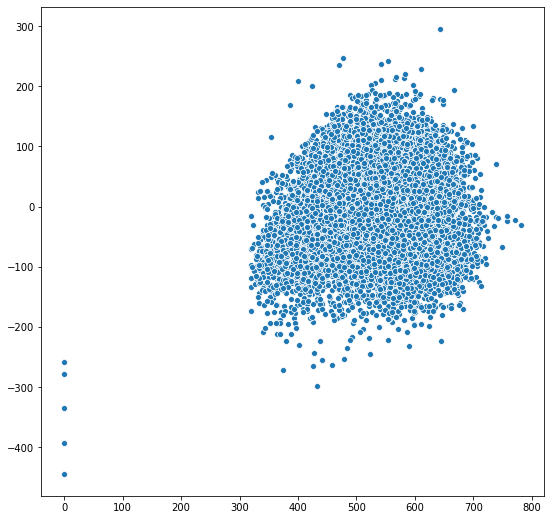

In [43]:
import matplotlib.pyplot as plt

# predição TOSCA do Guilherme. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))
plt.show()

> Este acima, usando um algorítmo 'dummy', para entender como ficaria comparando os valores reais com uma média

In [44]:
y_treino.mean()

528.69

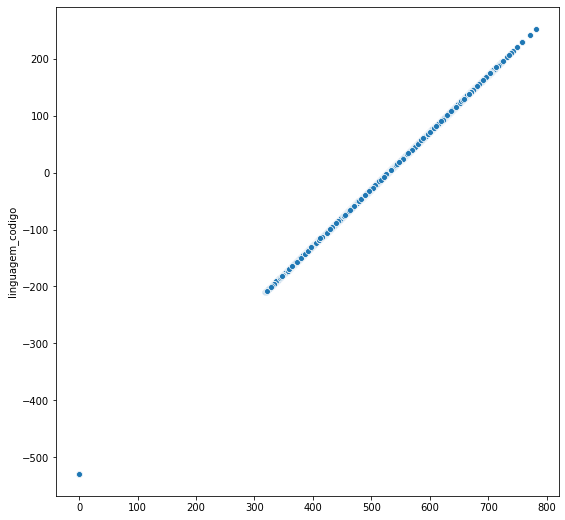

In [45]:
import matplotlib.pyplot as plt

# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())
plt.show()

> Este acima, usando um algorítmo 'dummy', para entender como ficaria comparando os valores reais com um valor fixo

Após discutir esses gráficos, vamos criar mais um modelo de **machine learning** basededo em "árvores":

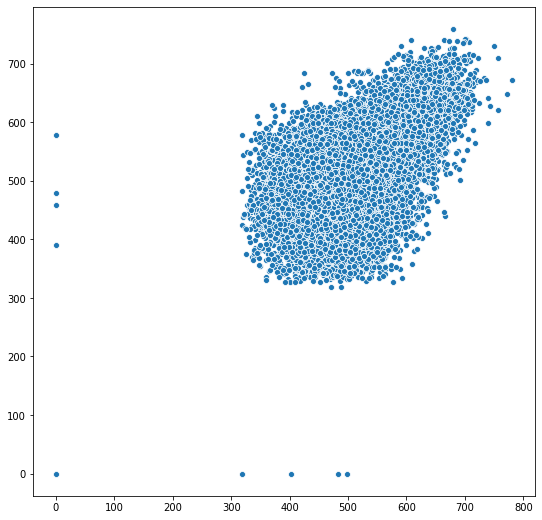

In [46]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

In [47]:
x_teste

,ciencias_naturais,ciencias_humanas,matematica,redacao
67300,465.40,659.30,743.70,560.00
113766,607.60,654.00,620.90,640.00
48328,632.50,703.10,568.10,720.00
9454,448.00,615.20,498.60,620.00
9515,437.40,465.40,523.20,540.00
...,...,...,...,...
32842,403.20,615.70,473.40,340.00
42388,559.30,575.20,501.70,780.00
55278,396.60,430.50,481.60,320.00
41511,396.60,495.00,421.30,320.00


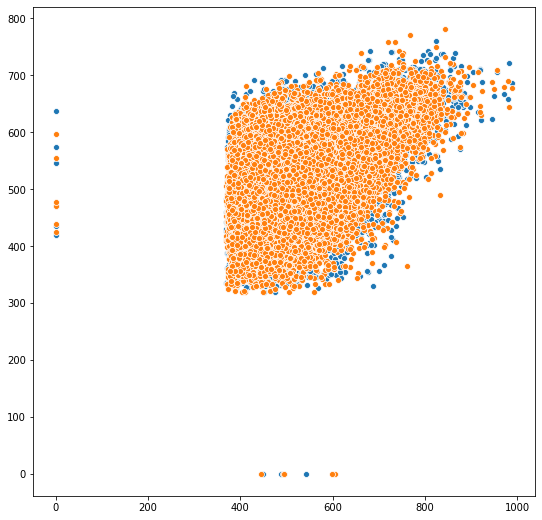

In [48]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

> Acima, azul: x = nota real de matemática, e y a nota encontrada pelo algoritmo.
> laranja: x = nota real de matemática, e y a nota real de linguagem_codigo.

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

## Medida resumo

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [49]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)


# média do qadrado dos erros

4160.60

In [50]:
print(y_teste.shape)
print(y_treino.shape)

(24318,)
(72952,)


Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [51]:
mean_squared_error(y_teste, y_teste)

0.00

Nosso resultado é zero! 
Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos **Dummy**.

In [52]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.48

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua.

# Desafios

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


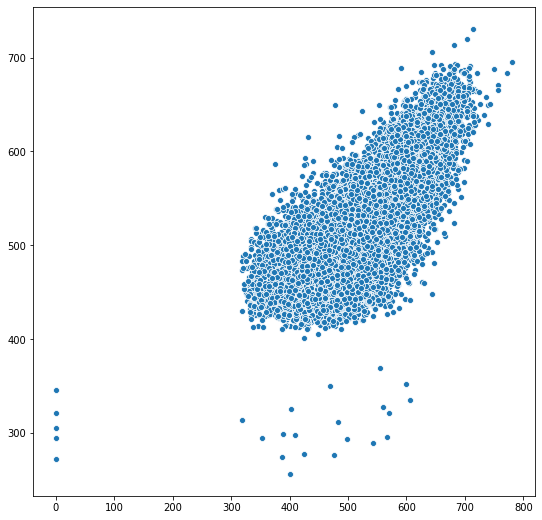

In [53]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(C=3,  max_iter=6000)
modelo.fit(x_treino, y_treino)

predicoes_notas_linguagem = modelo.predict(x_teste)

import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)
plt.show()


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

In [54]:
x_teste_media = x_teste.copy()
x_teste_media['media'] = x_teste.mean(axis=1)
x_teste_media['media']
x_teste.mean(axis=1)

67300    607.10
113766   630.62
48328    655.92
9454     545.45
9515     491.50
          ...  
32842    458.08
42388    604.05
55278    407.18
41511    408.23
62897    592.27
Length: 24318, dtype: float64

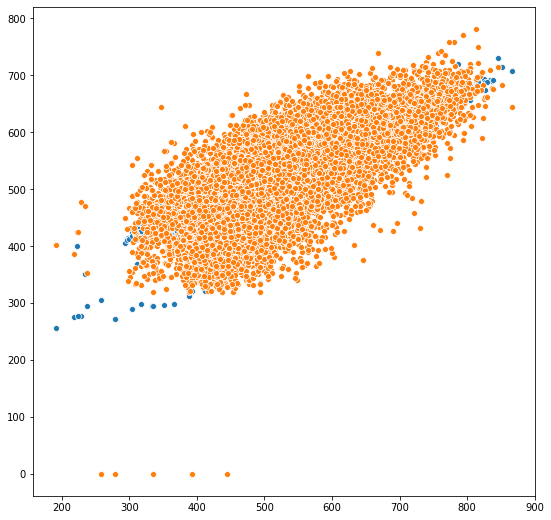

In [55]:
x_teste_media = x_teste.copy()
x_teste_media['media'] = x_teste.mean(axis=1)

plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste.mean(axis=1), y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis=1), y=y_teste.values)
plt.show()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


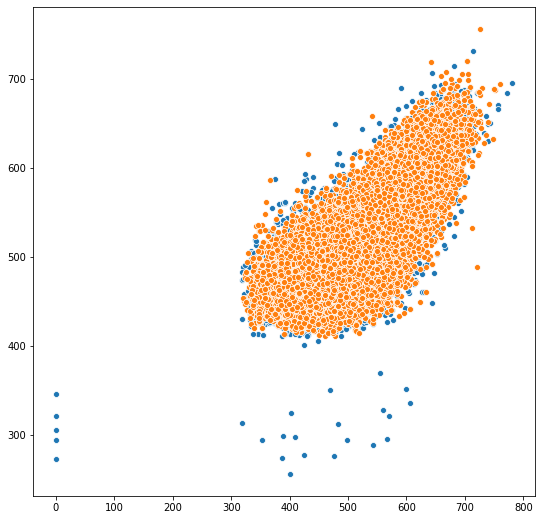

In [56]:
# Desafio 3

cols = ["ciencias_naturais","ciencias_humanas","linguagem_codigo","matematica","redacao"]
dados1 = dados_notas[cols]
dados_limpazero = dados1[(dados1[cols] > 0)][cols].dropna()
dados_limpazero


x_tenho_sem_0 = dados_limpazero[["ciencias_naturais","ciencias_humanas","matematica","redacao"]]
x_tenho_sem_0.head()


y_adivinhar_sem_0 = dados_limpazero["linguagem_codigo"]
y_adivinhar_sem_0.head()


from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)
# f(x) = y
x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(x_tenho_sem_0, y_adivinhar_sem_0, random_state =  326784)

from sklearn.svm import LinearSVR

modelo2 = LinearSVR()
modelo2.fit(x_treino2, y_treino2)
predicoes_notas_linguagem2 = modelo.predict(x_teste2)

import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)
sns.scatterplot(x=y_teste2.values, y=predicoes_notas_linguagem2)
plt.show()


In [57]:
print(dados_notas.shape)
print(dados_limpazero.shape)


(97270, 5)
(95181, 5)


## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

O que fizemos foi criar um modelo de machine learning, onde dada uma determinada informação, um algoritmo que irá tentar descobrir um valor.

O modelo que fizemos não é muito bom, visto que o MSE, quanto mais próximo do 0 é melhor, e o nosso modelo, nos testes que fizemos, variou entre 4000 e 5000.


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

0.00

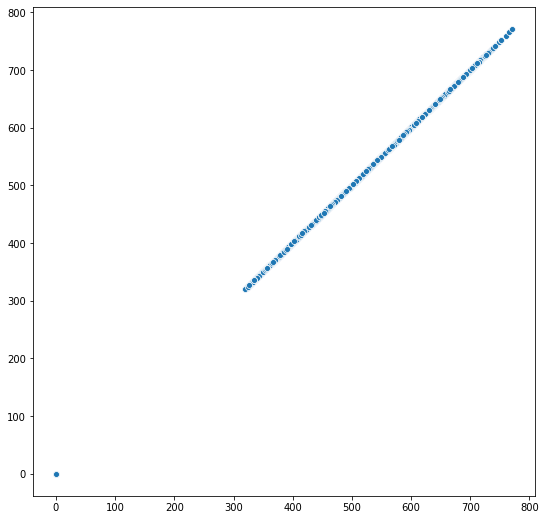

In [58]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)


predicoes_notas_linguagem_treino = modelo.predict(x_treino)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_treino.values, y=predicoes_notas_linguagem_treino)


mean_squared_error(y_treino, predicoes_notas_linguagem_treino)
